In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 16) 
mpl.rc('ytick', labelsize = 16)

In [3]:
#colors = ['darkgray', 'black', '#2a9d8f', '#e76f51', '#f2c812','#2f4f4f', '#eba75f']
colors = ['black', '#545454', '#b3b3b3', '#2a9d8f', '#e76f51', '#eba75f', '#2f4f4f']

In [4]:
def apply_alpha(hex_color, alpha=0.4, bg_color=(1, 1, 1)):
    rgb = mcolors.hex2color(hex_color)  # Convert hex to RGB
    blended_rgb = [(1 - alpha) * bg + alpha * fg for bg, fg in zip(bg_color, rgb)]
    return mcolors.to_hex(blended_rgb)

In [5]:
my_alpha = 0.25
colors_with_alpha = [apply_alpha(c, alpha=my_alpha) for c in colors]

In [6]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/KN/results_10years'

In [7]:
detectors_ntw = ['ET_delta_10_cryo','ET_2L_15_cryo_45deg',
                 'ET_delta_10_cryo_LVKI','ET_2L_15_cryo_45deg_LVKI',
                 'ET_delta_10_cryo_1CE','ET_2L_15_cryo_45deg_1CE',
                 'ET_delta_10_cryo_2CE','ET_2L_15_cryo_45deg_2CE']

lbs_list = ['ET-$\Delta$','ET-2L','ET-$\Delta$+LVKI','ET-2L+LVKI',
            'ET-$\Delta$+1CE','ET-2L+1CE','ET-$\Delta$+2CE','ET-2L+2CE']

lbs = ['network_SNR', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
	   'psi', 'geocent_time', 'phase', 'redshift', 'lambda_1', 'lambda_2', 'err_mass_1', 
	   'err_mass_2', 'err_luminosity_distance', 'err_dec', 'err_ra', 'err_theta_jn',
	   'err_psi', 'err_geocent_time', 'err_phase', 'err_lambda_1', 'err_lambda_2', 'err_sky_location']

lbs_signals = ['mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
	   'psi', 'geocent_time', 'phase', 'redshift', 'lambda_1', 'lambda_2', 'network_SNR']

In [8]:
my_linewidth = 0.5

In [9]:
sky_loc_area = [100, 40, 20, 10, 1]

inj = mpatches.Patch(facecolor='white', edgecolor=colors[0], linewidth=my_linewidth, linestyle='dotted', label='injected')
det = mpatches.Patch(facecolor='white', edgecolor=colors[0], linewidth=my_linewidth, linestyle='solid', label='detected')  
sky_loc0 = mpatches.Patch(facecolor=colors_with_alpha[2], edgecolor=colors[2], linewidth=my_linewidth, label='$\Delta \Omega_{90} < %s$ deg$^2$' %str(sky_loc_area[0]))
sky_loc1 = mpatches.Patch(facecolor=colors_with_alpha[3], edgecolor=colors[3], linewidth=my_linewidth, label='$\Delta \Omega_{90} < %s$ deg$^2$' %str(sky_loc_area[1]))
sky_loc2 = mpatches.Patch(facecolor=colors_with_alpha[4], edgecolor=colors[4], linewidth=my_linewidth, label='$\Delta \Omega_{90} < %s$ deg$^2$' %str(sky_loc_area[2]))
sky_loc3 = mpatches.Patch(facecolor=colors_with_alpha[5], edgecolor=colors[5], linewidth=my_linewidth, label='$\Delta \Omega_{90} < %s$ deg$^2$' %str(sky_loc_area[3]))
sky_loc4 = mpatches.Patch(facecolor=colors_with_alpha[6], edgecolor=colors[6], linewidth=my_linewidth, label='$\Delta \Omega_{90} < %s$ deg$^2$' %str(sky_loc_area[4]))

/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/128257733.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/128257733.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/128257733.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='uppe

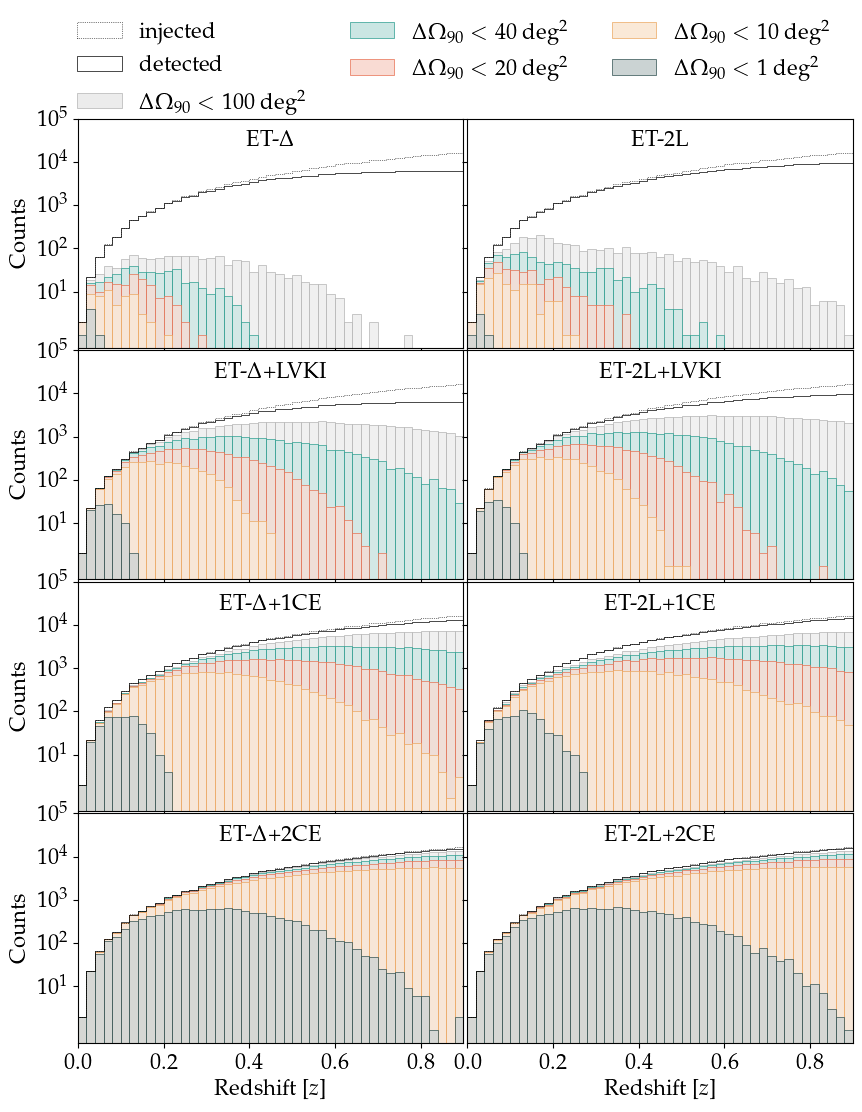

In [10]:
alpha = 1.0
eos = 'BLh_uniform'
bin_width = 0.02

fig, axs = plt.subplots(4, 2, figsize=(10, 12), sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    injections = pd.read_csv('%s/%s/%s/%s/Signals_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
					str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
						names = lbs_signals, skiprows = 1, delimiter = ' ')

    data = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')

    sns.histplot(x = injections['redshift'], bins = np.arange(0, 1, bin_width), ax=ax, color = colors[0], linewidth=my_linewidth, linestyle='dotted', element='step', fill=False)
    sns.histplot(x = data['redshift'], bins = np.arange(0, 1, bin_width), ax=ax, color = colors[0], linewidth=my_linewidth, linestyle='solid', element='step', fill=False)
    for j, value_area in enumerate(sky_loc_area):
        sky_loc_filtered = data.loc[4.6 * (180./np.pi)**2 * data['err_sky_location'] < value_area]
        sns.histplot(x = sky_loc_filtered['redshift'], bins = np.arange(0, 1, bin_width),
                     ax=ax, color=colors_with_alpha[j+2], edgecolor=colors[j+2],linewidth=my_linewidth)
        
    ax.set_xlabel('Redshift [$z$]', fontsize=16)
    ax.set_ylabel('Counts', fontsize=16)
    ax.set_yscale('log')
    ax.set_ylim(0.5, 1e5)
    ax.set_xlim(0, 0.9)
    ax.set_yticks([1e1, 1e2, 1e3, 1e4, 1e5])
    ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')

fig.subplots_adjust(hspace=0.01, wspace=0.01)
fig.legend(handles=[inj, det, sky_loc0, sky_loc1, sky_loc2, sky_loc3, sky_loc4], fontsize=16, loc='upper center', bbox_to_anchor=(0.5,0.98), ncol = 3, frameon=False)
plt.savefig('plots/kn_hist_detection_sky_loc_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()


### Additional plots

/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/1977279538.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/1977279538.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/1977279538.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='u

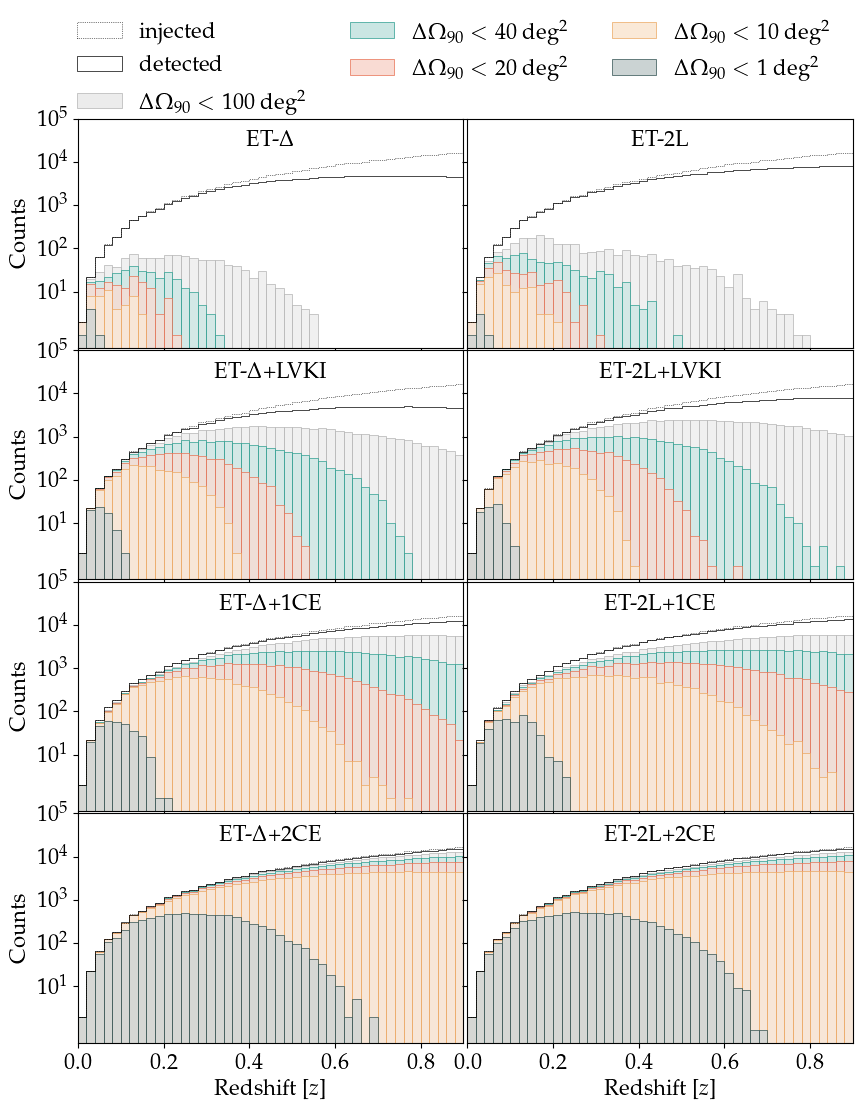

In [11]:
alpha = 1.0
eos = 'BLh_gaussian'
bin_width = 0.02

fig, axs = plt.subplots(4, 2, figsize=(10, 12), sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    injections = pd.read_csv('%s/%s/%s/%s/Signals_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
					str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
						names = lbs_signals, skiprows = 1, delimiter = ' ')

    data = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')

    sns.histplot(x = injections['redshift'], bins = np.arange(0, 1, bin_width), ax=ax, color = colors[0], linewidth=my_linewidth, linestyle='dotted', element='step', fill=False)
    sns.histplot(x = data['redshift'], bins = np.arange(0, 1, bin_width), ax=ax, color = colors[0], linewidth=my_linewidth, linestyle='solid', element='step', fill=False)
    for j, value_area in enumerate(sky_loc_area):
        sky_loc_filtered = data.loc[4.6 * (180./np.pi)**2 * data['err_sky_location'] < value_area]
        sns.histplot(x = sky_loc_filtered['redshift'], bins = np.arange(0, 1, bin_width),
                     ax=ax, color=colors_with_alpha[j+2], edgecolor=colors[j+2],linewidth=my_linewidth)
        
    ax.set_xlabel('Redshift [$z$]', fontsize=16)
    ax.set_ylabel('Counts', fontsize=16)
    ax.set_yscale('log')
    ax.set_ylim(0.5, 1e5)
    ax.set_xlim(0, 0.9)
    ax.set_yticks([1e1, 1e2, 1e3, 1e4, 1e5])
    ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')

fig.subplots_adjust(hspace=0.01, wspace=0.01)
fig.legend(handles=[inj, det, sky_loc0, sky_loc1, sky_loc2, sky_loc3, sky_loc4], fontsize=16, loc='upper center', bbox_to_anchor=(0.5,0.98), ncol = 3, frameon=False)
plt.savefig('plots/kn_hist_detection_sky_loc_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()


/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/1296790497.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/1296790497.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/1296790497.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='u

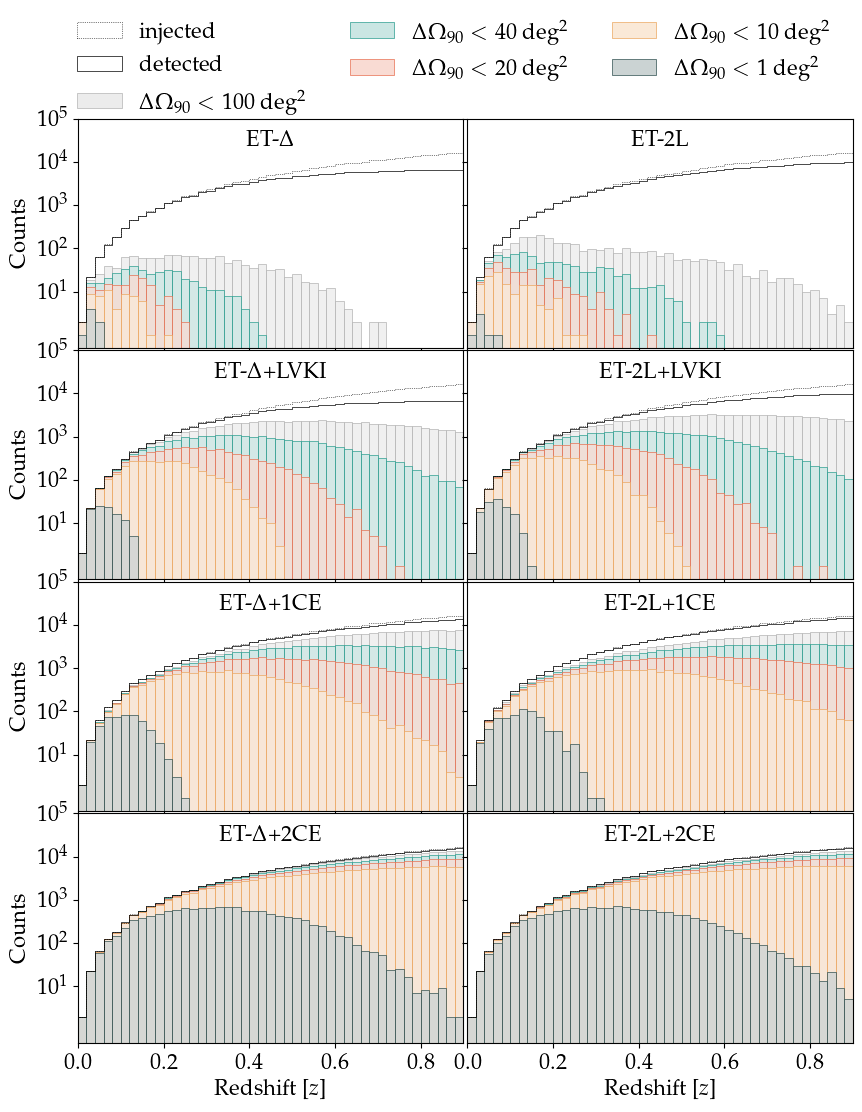

In [12]:
alpha = 1.0
eos = 'APR4_uniform'
bin_width = 0.02

fig, axs = plt.subplots(4, 2, figsize=(10, 12), sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    injections = pd.read_csv('%s/%s/%s/%s/Signals_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
					str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
						names = lbs_signals, skiprows = 1, delimiter = ' ')

    data = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')

    sns.histplot(x = injections['redshift'], bins = np.arange(0, 1, bin_width), ax=ax, color = colors[0], linewidth=my_linewidth, linestyle='dotted', element='step', fill=False)
    sns.histplot(x = data['redshift'], bins = np.arange(0, 1, bin_width), ax=ax, color = colors[0], linewidth=my_linewidth, linestyle='solid', element='step', fill=False)
    for j, value_area in enumerate(sky_loc_area):
        sky_loc_filtered = data.loc[4.6 * (180./np.pi)**2 * data['err_sky_location'] < value_area]
        sns.histplot(x = sky_loc_filtered['redshift'], bins = np.arange(0, 1, bin_width),
                     ax=ax, color=colors_with_alpha[j+2], edgecolor=colors[j+2],linewidth=my_linewidth)
        
    ax.set_xlabel('Redshift [$z$]', fontsize=16)
    ax.set_ylabel('Counts', fontsize=16)
    ax.set_yscale('log')
    ax.set_ylim(0.5, 1e5)
    ax.set_xlim(0, 0.9)
    ax.set_yticks([1e1, 1e2, 1e3, 1e4, 1e5])
    ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')

fig.subplots_adjust(hspace=0.01, wspace=0.01)
fig.legend(handles=[inj, det, sky_loc0, sky_loc1, sky_loc2, sky_loc3, sky_loc4], fontsize=16, loc='upper center', bbox_to_anchor=(0.5,0.98), ncol = 3, frameon=False)
plt.savefig('plots/kn_hist_detection_sky_loc_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()

/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/2004879819.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/2004879819.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_10407/2004879819.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='u

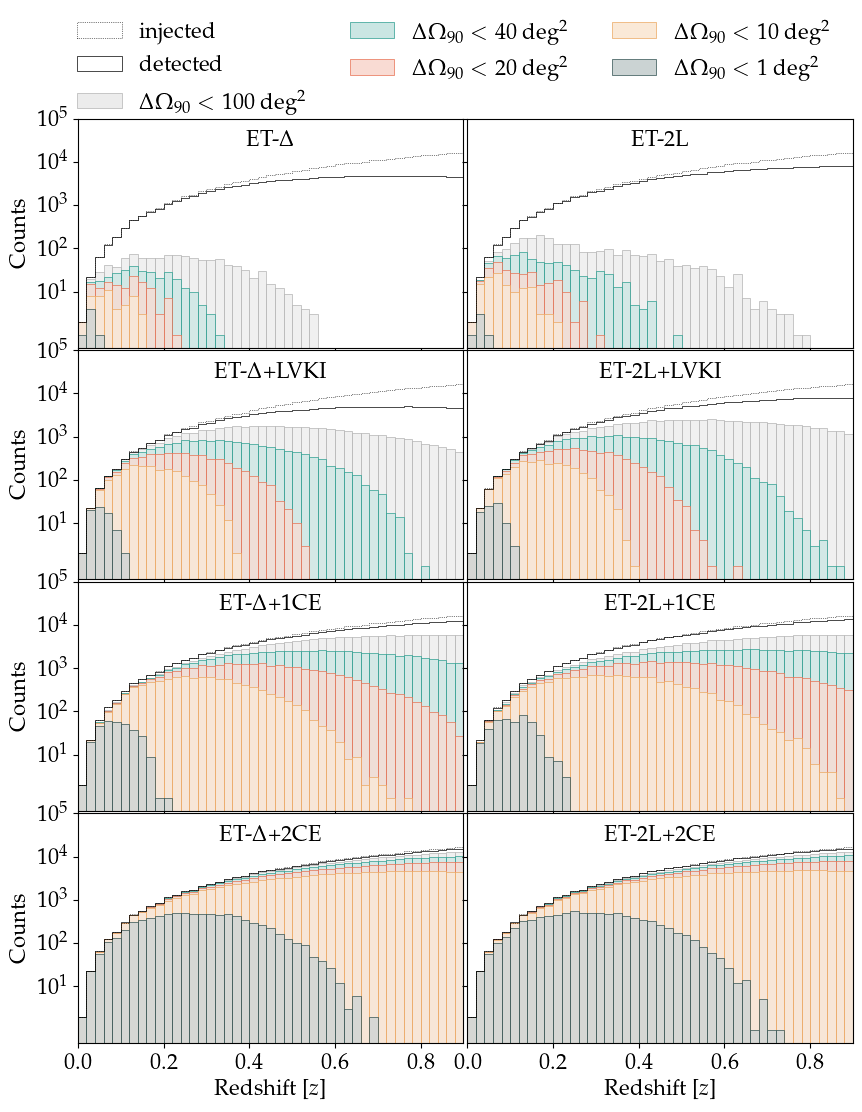

In [13]:
alpha = 1.0
eos = 'APR4_gaussian'
bin_width = 0.02

fig, axs = plt.subplots(4, 2, figsize=(10, 12), sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    injections = pd.read_csv('%s/%s/%s/%s/Signals_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
					str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
						names = lbs_signals, skiprows = 1, delimiter = ' ')

    data = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')

    sns.histplot(x = injections['redshift'], bins = np.arange(0, 1, bin_width), ax=ax, color = colors[0], linewidth=my_linewidth, linestyle='dotted', element='step', fill=False)
    sns.histplot(x = data['redshift'], bins = np.arange(0, 1, bin_width), ax=ax, color = colors[0], linewidth=my_linewidth, linestyle='solid', element='step', fill=False)
    for j, value_area in enumerate(sky_loc_area):
        sky_loc_filtered = data.loc[4.6 * (180./np.pi)**2 * data['err_sky_location'] < value_area]
        sns.histplot(x = sky_loc_filtered['redshift'], bins = np.arange(0, 1, bin_width),
                     ax=ax, color=colors_with_alpha[j+2], edgecolor=colors[j+2],linewidth=my_linewidth)
        
    ax.set_xlabel('Redshift [$z$]', fontsize=16)
    ax.set_ylabel('Counts', fontsize=16)
    ax.set_yscale('log')
    ax.set_ylim(0.5, 1e5)
    ax.set_xlim(0, 0.9)
    ax.set_yticks([1e1, 1e2, 1e3, 1e4, 1e5])
    ax.legend(title=lbs_list[i], title_fontsize=16, frameon=False, loc='upper center')

fig.subplots_adjust(hspace=0.01, wspace=0.01)
fig.legend(handles=[inj, det, sky_loc0, sky_loc1, sky_loc2, sky_loc3, sky_loc4], fontsize=16, loc='upper center', bbox_to_anchor=(0.5,0.98), ncol = 3, frameon=False)
plt.savefig('plots/kn_hist_detection_sky_loc_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()